## House price prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
# Load the Boston Housing Prices dataset
data = fetch_california_housing()
X, y = data.data, data.target
X.shape, y.shape

((20640, 8), (20640,))

In [3]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Linear Regression with scikit-learn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)



In [5]:
# Evaluate using MAE and MSE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}")



Linear Regression - MAE: 0.53, MSE: 0.56


In [6]:
# Neural Network Regression with TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)  # Output layer (single value for regression)
])

earlystopping = EarlyStopping(
    # monitor='val_loss',
    # monitor='val_y_fallecidos_root_mean_squared_error',
    monitor='val_mae',
    patience=10, 
    restore_best_weights=True)

model.compile(optimizer='adam', loss='mean_squared_error', metrics='mae')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)



Epoch 1/100
516/516 [==============================] - 9s 5ms/step - loss: 4530.1963 - mae: 16.0804
Epoch 2/100
516/516 [==============================] - 3s 6ms/step - loss: 4.2053 - mae: 0.9415
Epoch 3/100
516/516 [==============================] - 3s 5ms/step - loss: 1.3827 - mae: 0.7548
Epoch 4/100
516/516 [==============================] - 3s 5ms/step - loss: 0.7797 - mae: 0.6575
Epoch 5/100
516/516 [==============================] - 3s 5ms/step - loss: 0.7519 - mae: 0.6523
Epoch 6/100
516/516 [==============================] - 3s 5ms/step - loss: 0.8120 - mae: 0.6727
Epoch 7/100
516/516 [==============================] - 3s 5ms/step - loss: 0.7527 - mae: 0.6523
Epoch 8/100
516/516 [==============================] - 3s 5ms/step - loss: 1.0767 - mae: 0.7477
Epoch 9/100
516/516 [==============================] - 3s 5ms/step - loss: 1.3481 - mae: 0.7149
Epoch 10/100
516/516 [==============================] - 3s 5ms/step - loss: 2.2528 - mae: 0.8512
Epoch 11/100
516/516 [=============

In [7]:
from sklearn.metrics import r2_score
y_pred_nn = model.predict(X_test).flatten()  # Flatten predictions
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_score_nn = r2_score(y_true=y_test, y_pred=y_pred_nn)
print(f"Neural Network Regression - MAE: {mae_nn:.2f}, MSE: {mse_nn:.2f}, R2-score: {r2_score_nn:.2f}")


129/129 [==============================] - 1s 4ms/step
Neural Network Regression - MAE: 0.62, MSE: 0.77, R2-score: 0.41


In [28]:
history.history.keys()

dict_keys(['loss', 'mae'])

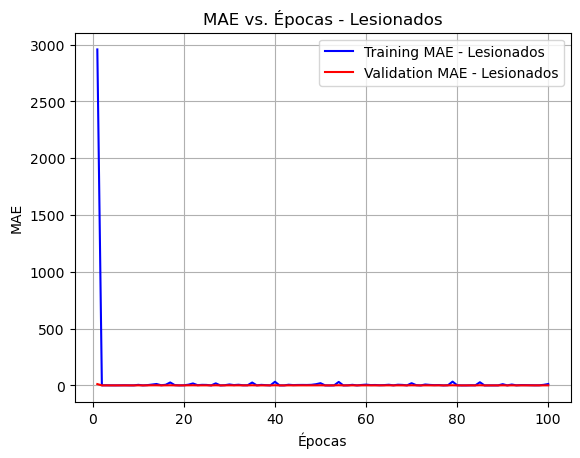

In [29]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history.get('loss')) + 1)
plt.plot(epochs, history.history.get('loss'), 'b', label='Training MAE - Lesionados')
plt.plot(epochs, history.history.get('mae'), 'r', label='Validation MAE - Lesionados')
plt.title('MAE vs. Épocas - Lesionados')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.show()

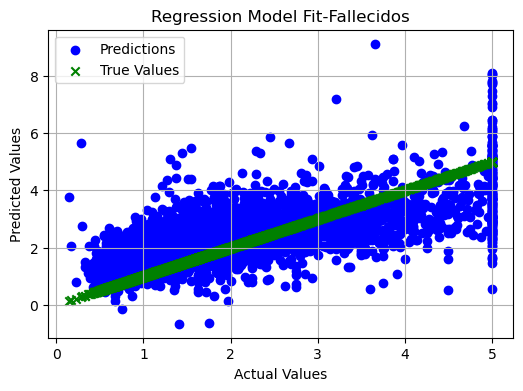

In [30]:
y_true = y_test
y_pred = y_pred_nn
# Scatter plot
plt.figure(figsize=(6, 4))
# Plot predicted values (blue)
plt.scatter(y_true, y_pred, color='blue', label='Predictions')

# Plot true values (green)
plt.scatter(y_true, y_true, color='green', label='True Values', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Fit-Fallecidos')
plt.legend()
plt.grid(True)
plt.show()

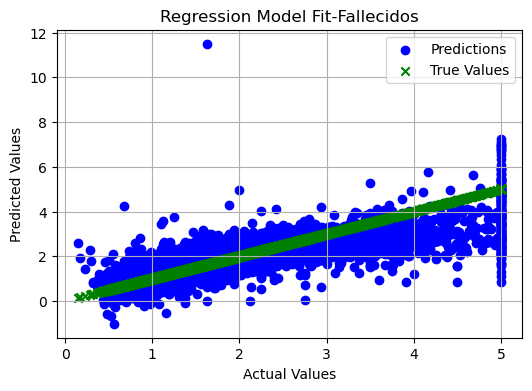

In [31]:
y_true = y_test
y_pred = y_pred_lr
# Scatter plot
plt.figure(figsize=(6, 4))
# Plot predicted values (blue)
plt.scatter(y_true, y_pred, color='blue', label='Predictions')

# Plot true values (green)
plt.scatter(y_true, y_true, color='green', label='True Values', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Model Fit-Fallecidos')
plt.legend()
plt.grid(True)
plt.show()